# Different configurations using homeostasis with Kmeans and random initialisation of the prototypes and gaussian filtering on time-surfaces

In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%cd '../'

/Users/joe/Documents/boulot/git/homhots/HOTS


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import time

from HOTS.ToolsMonitor import GenerateActivationMap, DisplayActivationMap
from HOTS.Event import Event, SimpleAlphabet, LoadNMNIST
from HOTS.STS import STS
from HOTS.Layer import ClusteringLayer
from HOTS.ToolsMonitor import (
    DisplayImage,
    DisplaySurface3D,
    DisplaySurface2D,
    DisplayConvergence,
)
from HOTS.Tools import SaveObject, LoadObject
from HOTS.Classifier import Classifier
from HOTS.Network import Network
from HOTS.KmeansLagorce import KmeansLagorce
from HOTS.KmeansMaro import KmeansMaro

tau = 5e-4
R = 2
filthr = 2
nbkNN = None
krnlinit = None
decay = 'exponential'
nb_cluster = [4, 8, 16]
ImageSize = (32, 32)
DataPath = "Data/alphabet_ExtractedStabilized.mat"
LabelPath = "Data/alphabet_label.pkl"

In [3]:
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(
    NbTrainingData=36,
    NbTestingData=40,
    Path=DataPath,
    LabelPath=LabelPath,
    ClusteringData=[1, 32, 19, 22, 29],
    OutOnePolarity=False,
    verbose=0,
)

# Replication of HOTS results (Lagorce 2017)

In [4]:
method = 'lagorce'
hom = False

L1 = ClusteringLayer(
    tau=tau,
    R=R,
    verbose=0,
    ThrFilter=filthr,
    LearningAlgo=method,
    kernel=decay,
    homeo=hom,
    init=krnlinit
)
L2 = ClusteringLayer(
    tau=10 * tau,
    R=2 * R,
    verbose=0,
    ThrFilter=filthr,
    LearningAlgo=method,
    kernel=decay,
    homeo=hom,
    init=krnlinit
)
L3 = ClusteringLayer(
    tau=10 * 10 * tau,
    R=2 * 2 * R,
    verbose=0,
    ThrFilter=filthr,
    LearningAlgo=method,
    kernel=decay,
    homeo=hom,
    init=krnlinit
)
Net = Network([L1, L2, L3])

timestr = time.strftime("%Y%m%d")
timestr = '20201021'


if hom==True:
    fname = 'Records/EXP_01_LagorceKmeans/'+timestr+'_hots_'+str(tau)+'_'+method+'_homeo.pkl'
else:
    fname = 'Records/EXP_01_LagorceKmeans/'+timestr+'_hots_'+str(tau)+'_'+method+'.pkl'

if not os.path.isfile(fname):
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(
        event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=3
    )
    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer)
    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer)

    Classif0 = Classifier(
        event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
    )
    prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN, to_print=True)
    SaveObject([ClusterLayer, Classif0], fname)
else:
    ClusterLayer, Classif0 = LoadObject(fname)
    prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN, to_print=True)

battacha:97.5% ### normalized:95.0% ### euclidian:97.5% ### 


done
done
done
done
[0.00000e+00 8.00000e-06 9.00000e-06 ... 1.11625e-01 1.11627e-01
 1.11632e-01]
done
done
done
done
done
done
done


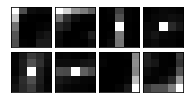

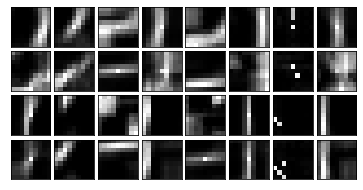

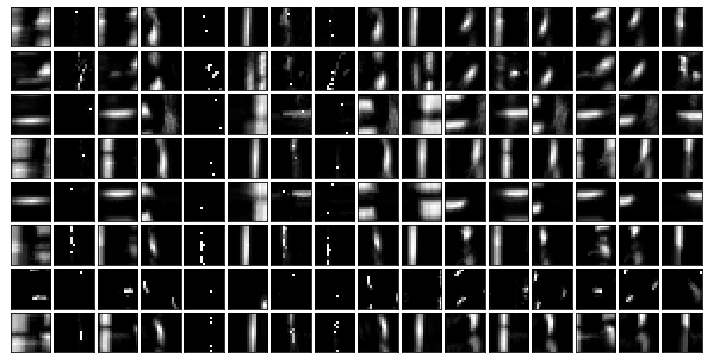

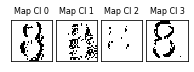

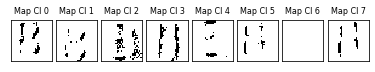

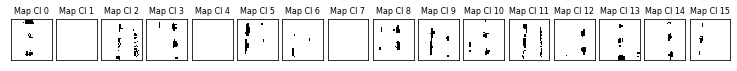

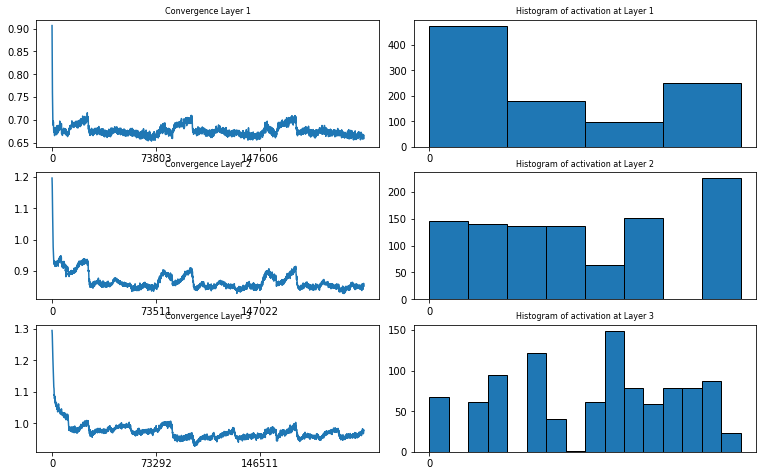

In [5]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=2)
print('done')
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
print('done')
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)
print('done')
event_to_show = Event(ImageSize=(32, 32), ListPolarities=[-1, 1], OutOnePolarity=False)
print('done')
event_to_show.LoadFromMat("Data/alphabet_ExtractedStabilized.mat", image_number=22)
print(event_to_show.time)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer)
print('done')
mapL1 = GenerateActivationMap(Net.Layers[0].output, ClusterLayer[0])
print('done')
DisplayActivationMap(mapL1, scale=2)
print('done')
mapL2 = GenerateActivationMap(Net.Layers[1].output, ClusterLayer[1])
print('done')
DisplayActivationMap(mapL2, scale=2)
print('done')
mapL3 = GenerateActivationMap(Net.Layers[2].output, ClusterLayer[2])
print('done')
DisplayActivationMap(mapL3, scale=2)
print('done')
DisplayConvergence(ClusterLayer, to_display=["error", "histo"])

## Adding Homeostasis

In [6]:
method = 'lagorce'
hom = True

L1 = ClusteringLayer(
    tau=tau,
    R=R,
    verbose=0,
    ThrFilter=filthr,
    LearningAlgo=method,
    kernel=decay,
    homeo=hom,
    init=krnlinit
)
L2 = ClusteringLayer(
    tau=10 * tau,
    R=2 * R,
    verbose=0,
    ThrFilter=filthr,
    LearningAlgo=method,
    kernel=decay,
    homeo=hom,
    init=krnlinit
)
L3 = ClusteringLayer(
    tau=10 * 10 * tau,
    R=2 * 2 * R,
    verbose=0,
    ThrFilter=filthr,
    LearningAlgo=method,
    kernel=decay,
    homeo=hom,
    init=krnlinit
)
Net = Network([L1, L2, L3])

timestr = time.strftime("%Y%m%d")
timestr = '20201021'

if hom==True:
    fname = 'Records/EXP_01_LagorceKmeans/'+timestr+'_hots_'+str(tau)+'_'+method+'_homeo.pkl'
else:
    fname = 'Records/EXP_01_LagorceKmeans/'+timestr+'_hots_'+str(tau)+'_'+method+'.pkl'

if not os.path.isfile(fname):
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(
        event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=3
    )
    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer)
    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer)

    Classif0 = Classifier(
        event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
    )
    prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN, to_print=True)
    SaveObject([ClusterLayer, Classif0], fname)
else:
    ClusterLayer, Classif0 = LoadObject(fname)
    prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN, to_print=True)

battacha:92.5% ### normalized:95.0% ### euclidian:95.0% ### 


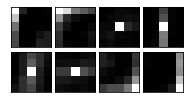

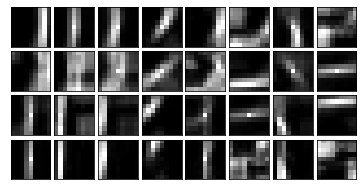

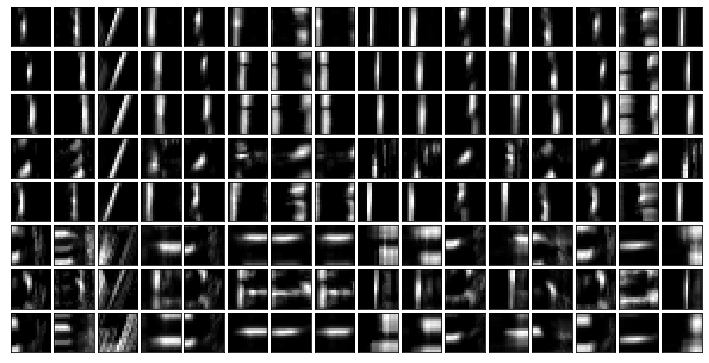

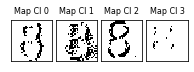

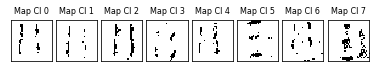

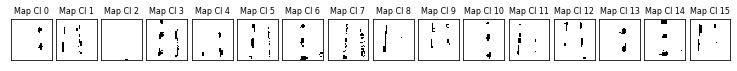

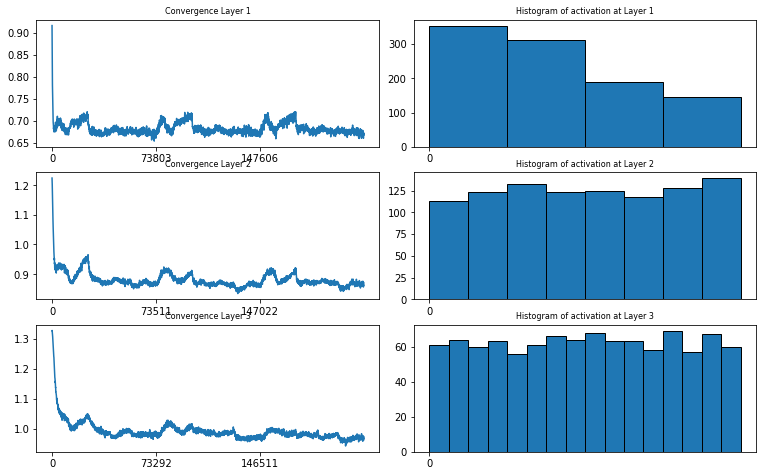

In [7]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)
event_to_show = Event(ImageSize=(32, 32), ListPolarities=[-1, 1], OutOnePolarity=False)
event_to_show.LoadFromMat("Data/alphabet_ExtractedStabilized.mat", image_number=22)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer)
mapL1 = GenerateActivationMap(Net.Layers[0].output, ClusterLayer[0])
DisplayActivationMap(mapL1, scale=2)
mapL2 = GenerateActivationMap(Net.Layers[1].output, ClusterLayer[1])
DisplayActivationMap(mapL2, scale=2)
mapL3 = GenerateActivationMap(Net.Layers[2].output, ClusterLayer[2])
DisplayActivationMap(mapL3, scale=2)

DisplayConvergence(ClusterLayer, to_display=["error", "histo"])

# Replication of Maro et al. 2020
## WITHOUT HOMEO - Exp4 : Maro Kmeans + Exponential Kernel + NoiseFilter(=2) + 2 Polarity in Input + 3 Cycles

In [8]:
method = 'maro'
hom = False

L1 = ClusteringLayer(
    tau=tau,
    R=R,
    verbose=0,
    ThrFilter=filthr,
    LearningAlgo=method,
    kernel=decay,
    homeo=hom,
    init=krnlinit
)
L2 = ClusteringLayer(
    tau=10 * tau,
    R=2 * R,
    verbose=0,
    ThrFilter=filthr,
    LearningAlgo=method,
    kernel=decay,
    homeo=hom,
    init=krnlinit
)
L3 = ClusteringLayer(
    tau=10 * 10 * tau,
    R=2 * 2 * R,
    verbose=0,
    ThrFilter=filthr,
    LearningAlgo=method,
    kernel=decay,
    homeo=hom,
    init=krnlinit
)
Net = Network([L1, L2, L3])

#timestr = time.strftime("%Y%m%d")

#if hom==True:
#    fname = 'Records/EXP_01_LagorceKmeans/'+timestr+'_hots'+'_'+method+'_homeo.pkl'
#else:
#    fname = 'Records/EXP_01_LagorceKmeans/'+timestr+'_hots'+'_'+method+'.pkl'
    
fname = 'Records/EXP_02_MaroKmeans/Exp04_2020-04-17_notrdninit.pkl'

if not os.path.isfile(fname):
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(
        event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=3
    )
    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer)
    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer)

    Classif0 = Classifier(
        event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
    )
    prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN, to_print=True)
    SaveObject([ClusterLayer, Classif0], fname)
else:
    ClusterLayer, Classif0 = LoadObject(fname)
    prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN, to_print=True)

battacha:95.0% ### normalized:92.5% ### euclidian:95.0% ### 


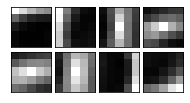

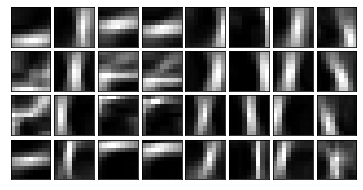

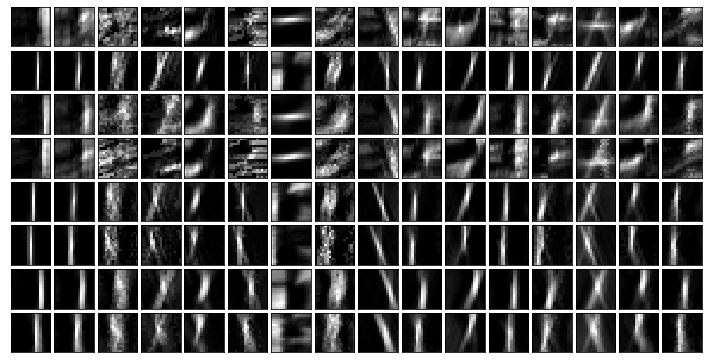

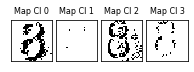

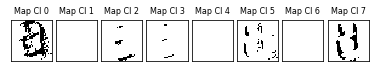

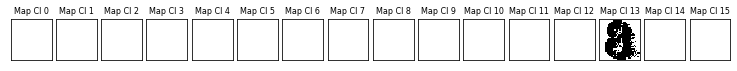

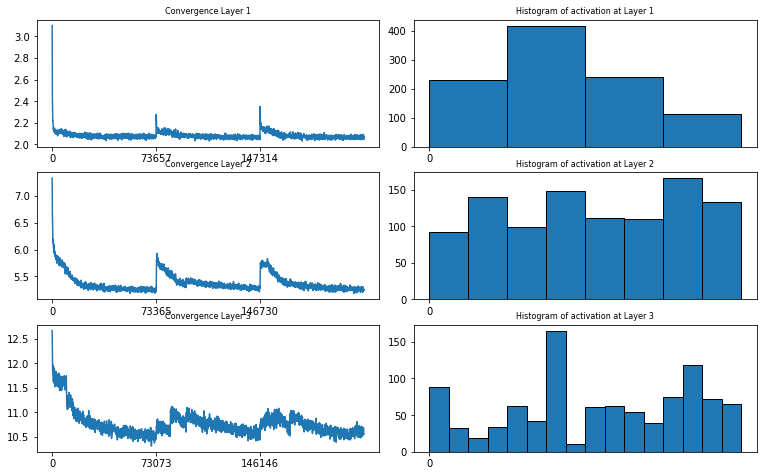

In [9]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)
event_to_show = Event(ImageSize=(32, 32), ListPolarities=[-1, 1], OutOnePolarity=False)
event_to_show.LoadFromMat("Data/alphabet_ExtractedStabilized.mat", image_number=22)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer)
mapL1 = GenerateActivationMap(Net.Layers[0].output, ClusterLayer[0])
DisplayActivationMap(mapL1, scale=2)
mapL2 = GenerateActivationMap(Net.Layers[1].output, ClusterLayer[1])
DisplayActivationMap(mapL2, scale=2)
mapL3 = GenerateActivationMap(Net.Layers[2].output, ClusterLayer[2])
DisplayActivationMap(mapL3, scale=2)

DisplayConvergence(ClusterLayer, to_display=["error", "histo"])

## WITH HOMEO - Exp3 : Maro Kmeans + Linear Kernel + NoiseFilter(=2) + 2 Polarity in Input + 3 Cycles

In [10]:
method = 'maro'
hom = True

L1 = ClusteringLayer(
    tau=tau,
    R=R,
    verbose=0,
    ThrFilter=filthr,
    LearningAlgo=method,
    kernel=decay,
    homeo=hom,
    init=krnlinit
)
L2 = ClusteringLayer(
    tau=10 * tau,
    R=2 * R,
    verbose=0,
    ThrFilter=filthr,
    LearningAlgo=method,
    kernel=decay,
    homeo=hom,
    init=krnlinit
)
L3 = ClusteringLayer(
    tau=10 * 10 * tau,
    R=2 * 2 * R,
    verbose=0,
    ThrFilter=filthr,
    LearningAlgo=method,
    kernel=decay,
    homeo=hom,
    init=krnlinit
)
Net = Network([L1, L2, L3])

#timestr = time.strftime("%Y%m%d")

#if hom==True:
#    fname = 'Records/EXP_01_LagorceKmeans/'+timestr+'_hots'+'_'+method+'_homeo.pkl'
#else:
#    fname = 'Records/EXP_01_LagorceKmeans/'+timestr+'_hots'+'_'+method+'.pkl'
    
fname = 'Records/EXP_02_MaroKmeans/Exp04_2020-10-09_homeo_notrdninit.pkl'

if not os.path.isfile(fname):
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(
        event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=3
    )
    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer)
    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer)

    Classif0 = Classifier(
        event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
    )
    prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN, to_print=True)
    SaveObject([ClusterLayer, Classif0], fname)
else:
    ClusterLayer, Classif0 = LoadObject(fname)
    prediction, accuracy, method = Classif0.HistogramDistance(knn=nbkNN, to_print=True)

battacha:92.5% ### normalized:95.0% ### euclidian:95.0% ### 


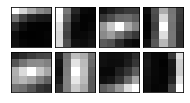

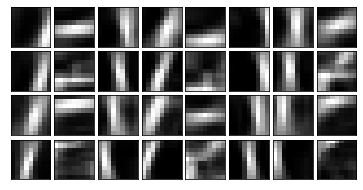

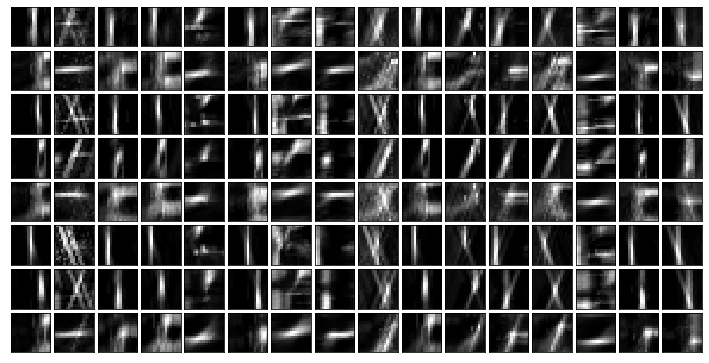

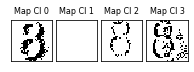

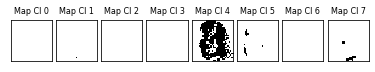

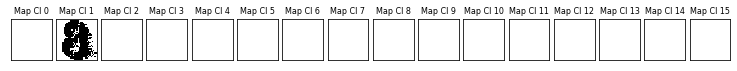

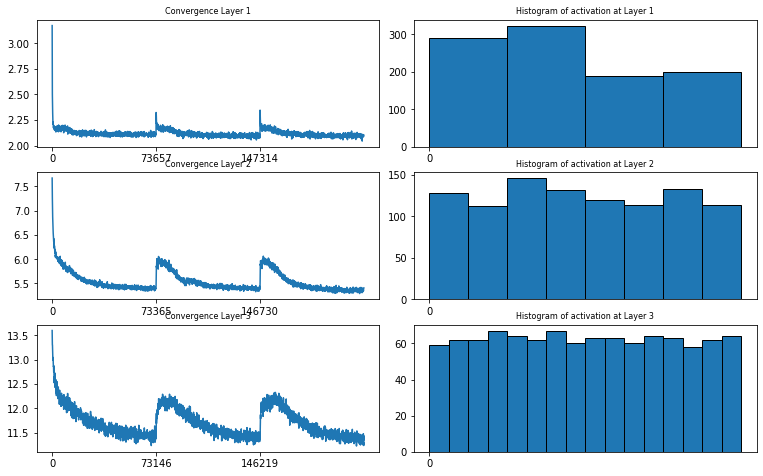

In [11]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)
event_to_show = Event(ImageSize=(32, 32), ListPolarities=[-1, 1], OutOnePolarity=False)
event_to_show.LoadFromMat("Data/alphabet_ExtractedStabilized.mat", image_number=22)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer)
mapL1 = GenerateActivationMap(Net.Layers[0].output, ClusterLayer[0])
DisplayActivationMap(mapL1, scale=2)
mapL2 = GenerateActivationMap(Net.Layers[1].output, ClusterLayer[1])
DisplayActivationMap(mapL2, scale=2)
mapL3 = GenerateActivationMap(Net.Layers[2].output, ClusterLayer[2])
DisplayActivationMap(mapL3, scale=2)

DisplayConvergence(ClusterLayer, to_display=["error", "histo"])